In [1]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error
from math import sqrt
from utils import get_test_table  # Make sure to have this utility function available
import pandas as pd
from sklearn.model_selection import ParameterGrid

Importing plotly failed. Interactive plots will not work.


In [2]:
# Define your hyperparameter grid
param_grid = {
    'changepoint_prior_scale': [0.001, 0.1, 0.5, 1],
    'seasonality_prior_scale': [0.01, 1.0, 10.0, 30.0]
}

# Create the grid
grid = ParameterGrid(param_grid)

In [3]:
# Load your data
X_train, X_test, y_train, y_test = get_test_table()


train_df = pd.concat([X_train[['date']], y_train], axis=1)
train_df = train_df.rename(columns={'date': 'ds', 'prec': 'y'})

additional_regressors = ['surf_net_therm_rad_max', '10m_wind_u', 'surf_net_therm_rad_mean']

train_df = pd.concat([train_df, X_train[additional_regressors]], axis=1)


In [28]:
results = []

for params in grid:
    model = Prophet(
        changepoint_prior_scale=params['changepoint_prior_scale'],
        seasonality_prior_scale=params['seasonality_prior_scale']
    )
    
    for regressor in additional_regressors:
        model.add_regressor(regressor)

    model.fit(train_df)

    future_df = pd.concat([X_test[['date']].rename(columns={'date': 'ds'}), X_test[additional_regressors]], axis=1)

    forecast = model.predict(future_df)
    #Saying that min is 0
    forecast['yhat'] = forecast['yhat'].clip(lower=0)

    y_pred = forecast['yhat'].values
    rmse = sqrt(mean_squared_error(y_test.values, y_pred))

    results.append({'params': params, 'rmse': rmse})

    print(f"Parameters: {params}, RMSE: {rmse:.4f}")

best_params = sorted(results, key=lambda x: x['rmse'])[0]
print(f'\nBest Parameters: {best_params}')

13:18:18 - cmdstanpy - INFO - Chain [1] start processing
13:18:19 - cmdstanpy - INFO - Chain [1] done processing


Parameters: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01}, RMSE: 5.5533


13:18:24 - cmdstanpy - INFO - Chain [1] start processing
13:18:25 - cmdstanpy - INFO - Chain [1] done processing


Parameters: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 1.0}, RMSE: 5.5552


13:18:31 - cmdstanpy - INFO - Chain [1] start processing
13:18:33 - cmdstanpy - INFO - Chain [1] done processing


Parameters: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10.0}, RMSE: 5.5592


13:18:40 - cmdstanpy - INFO - Chain [1] start processing
13:18:42 - cmdstanpy - INFO - Chain [1] done processing


Parameters: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 20.0}, RMSE: 5.5597


13:18:47 - cmdstanpy - INFO - Chain [1] start processing
13:18:48 - cmdstanpy - INFO - Chain [1] done processing


Parameters: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 30.0}, RMSE: 5.5593


13:18:55 - cmdstanpy - INFO - Chain [1] start processing
13:18:59 - cmdstanpy - INFO - Chain [1] done processing


Parameters: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.01}, RMSE: 5.5170


13:19:04 - cmdstanpy - INFO - Chain [1] start processing
13:19:07 - cmdstanpy - INFO - Chain [1] done processing


Parameters: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 1.0}, RMSE: 5.5166


13:19:14 - cmdstanpy - INFO - Chain [1] start processing
13:19:18 - cmdstanpy - INFO - Chain [1] done processing


Parameters: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10.0}, RMSE: 5.5163


13:19:25 - cmdstanpy - INFO - Chain [1] start processing
13:19:29 - cmdstanpy - INFO - Chain [1] done processing


Parameters: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 20.0}, RMSE: 5.5164


13:19:37 - cmdstanpy - INFO - Chain [1] start processing
13:19:41 - cmdstanpy - INFO - Chain [1] done processing


Parameters: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 30.0}, RMSE: 5.5162


13:19:49 - cmdstanpy - INFO - Chain [1] start processing
13:19:52 - cmdstanpy - INFO - Chain [1] done processing


Parameters: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.01}, RMSE: 5.5174


13:19:57 - cmdstanpy - INFO - Chain [1] start processing
13:20:02 - cmdstanpy - INFO - Chain [1] done processing


Parameters: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 1.0}, RMSE: 5.5172


13:20:06 - cmdstanpy - INFO - Chain [1] start processing
13:20:09 - cmdstanpy - INFO - Chain [1] done processing


Parameters: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10.0}, RMSE: 5.5168


13:20:15 - cmdstanpy - INFO - Chain [1] start processing
13:20:21 - cmdstanpy - INFO - Chain [1] done processing


Parameters: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 20.0}, RMSE: 5.5166


13:20:28 - cmdstanpy - INFO - Chain [1] start processing
13:20:32 - cmdstanpy - INFO - Chain [1] done processing


Parameters: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 30.0}, RMSE: 5.5177


13:20:36 - cmdstanpy - INFO - Chain [1] start processing
13:20:42 - cmdstanpy - INFO - Chain [1] done processing


Parameters: {'changepoint_prior_scale': 1, 'seasonality_prior_scale': 0.01}, RMSE: 5.5168


13:20:46 - cmdstanpy - INFO - Chain [1] start processing
13:20:52 - cmdstanpy - INFO - Chain [1] done processing


Parameters: {'changepoint_prior_scale': 1, 'seasonality_prior_scale': 1.0}, RMSE: 5.5185


13:20:57 - cmdstanpy - INFO - Chain [1] start processing
13:21:03 - cmdstanpy - INFO - Chain [1] done processing


Parameters: {'changepoint_prior_scale': 1, 'seasonality_prior_scale': 10.0}, RMSE: 5.5174


13:21:08 - cmdstanpy - INFO - Chain [1] start processing
13:21:13 - cmdstanpy - INFO - Chain [1] done processing


Parameters: {'changepoint_prior_scale': 1, 'seasonality_prior_scale': 20.0}, RMSE: 5.5181


13:21:18 - cmdstanpy - INFO - Chain [1] start processing
13:21:26 - cmdstanpy - INFO - Chain [1] done processing


Parameters: {'changepoint_prior_scale': 1, 'seasonality_prior_scale': 30.0}, RMSE: 5.5171


13:21:31 - cmdstanpy - INFO - Chain [1] start processing
13:21:40 - cmdstanpy - INFO - Chain [1] done processing


Parameters: {'changepoint_prior_scale': 2, 'seasonality_prior_scale': 0.01}, RMSE: 5.5169


13:21:42 - cmdstanpy - INFO - Chain [1] start processing
13:21:46 - cmdstanpy - INFO - Chain [1] done processing


Parameters: {'changepoint_prior_scale': 2, 'seasonality_prior_scale': 1.0}, RMSE: 5.5173


13:21:49 - cmdstanpy - INFO - Chain [1] start processing
13:21:52 - cmdstanpy - INFO - Chain [1] done processing


Parameters: {'changepoint_prior_scale': 2, 'seasonality_prior_scale': 10.0}, RMSE: 5.5159


13:21:54 - cmdstanpy - INFO - Chain [1] start processing
13:21:57 - cmdstanpy - INFO - Chain [1] done processing


Parameters: {'changepoint_prior_scale': 2, 'seasonality_prior_scale': 20.0}, RMSE: 5.5197


13:22:02 - cmdstanpy - INFO - Chain [1] start processing
13:22:06 - cmdstanpy - INFO - Chain [1] done processing


Parameters: {'changepoint_prior_scale': 2, 'seasonality_prior_scale': 30.0}, RMSE: 5.5164

Best Parameters: {'params': {'changepoint_prior_scale': 2, 'seasonality_prior_scale': 10.0}, 'rmse': 5.515903312696955}


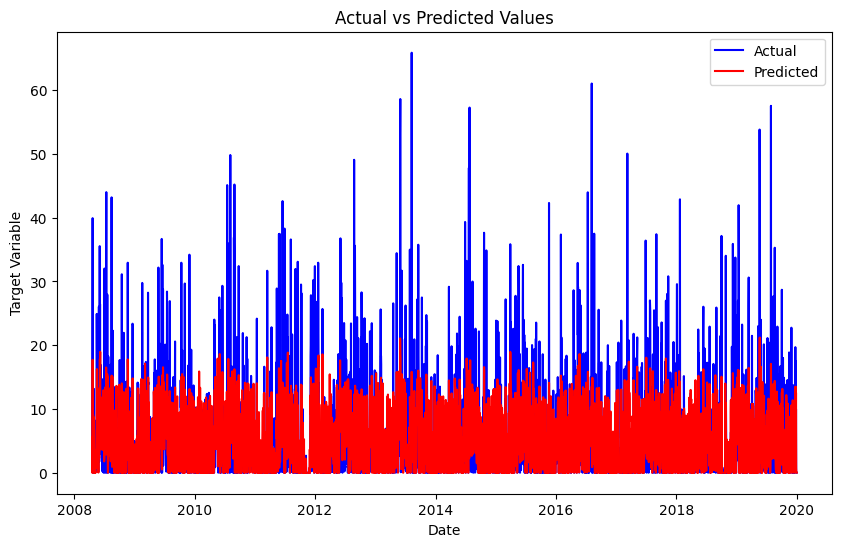

In [29]:
import matplotlib.pyplot as plt

# Assuming 'forecast' is your prediction result from Prophet and 'y_test' is your actual values
# Also, assuming 'X_test' contains the corresponding dates for 'y_test'

# Extract the dates for plotting (from the test set)
dates = X_test['date']

# Plot actual values
plt.figure(figsize=(10, 6))
plt.plot(dates, y_test.values, label='Actual', color='blue')

# Plot predicted values
plt.plot(dates, forecast['yhat'].values, label='Predicted', color='red')

# Adding title and labels
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Target Variable')

# Show legend
plt.legend()

# Display the plot
plt.show()
